# **PUBLIC OPINION ANALYSIS USING PYTHON DATA SCIENCE**

Submitted for *Project Class : Public Opinion Analysis Batch 20* by *SanberCode* *(2021, January)*

### **CASE:**
Covid-19 vaccine planned to be used 
by Indonesian government is vaccine producted by Chinese-owned Sinovac company. This vaccine is known to have arrived in Indonesia 
since December 2020. Sinovac vaccine planned to be used for the first time on January 13, 2021. Although it has not been granted permission by BPOM, the vaccine has been distributed to a number of regions in Indonesia.
Therefore, we will conduct public opinion analysis about this topic generally from social media, specifically Twitter using Twitter API to generate source data.



### Extracting Data from Twitter

*Import library*

In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

*Access key and token for twitter's API*

In [ ]:
consumer_key = "PcLyBz3imskMeeGwePnm8e3fo"
consumer_secret = "HT24SENSyFKPq42EMqlq5CFubC6IrqNzNGgF7mNGKxcfrqDYQO"
access_token = "416281151-SkjxDRWv9k5LSTih7zyh49XjH7CttC5s7qzPFRCF"
access_token_secret = "MO6c5NgYPMcAT89kFclnSnL9aosIKaMPQHu3dmnxNTpMk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

*Get data*
*   Keywords : "vaksin covid" or "vaksin sinovac"
*   Time Range : 2021/01/04 - 2021/01/05
*   Language : Indonesia
*   Expected Amount of Data : 1000
*   Actual Amount of Data : 814








In [ ]:
Indonesia_woe = 23424846

query = "vaksin covid OR vaksin sinovac"
new_query = query + " -filter:retweets"

set_data=[]
post = tweepy.Cursor(api.search, q=new_query, result_type="mixed", since="2021-01-04", until="2021-01-06", 
                     lang="id", tweet_mode="extended").items(1000)
for tweet in post :
    user_id = tweet.user.id
    screen_name = tweet.user.screen_name
    name = tweet.user.name
    tweetid = tweet.id
    tweets = tweet.full_text
    createdat = tweet.created_at
    location = tweet.user.location
    createdat2 = tweet.user.created_at
    followers = tweet.user.followers_count
    friends = tweet.user.friends_count
    verified = tweet.user.verified
    data = {"User ID":user_id, "Screen Name":screen_name, "Name":name, "Twitter ID":tweetid, "Tweets":tweets, 
            "Created at (Tweets)":createdat, "Location":location, "Created at (User)":createdat2, "Followers":followers, 
            "Friends":friends, "Verified":verified}
    set_data.append(data)

set_file = pd.DataFrame(set_data)
set_file.to_csv("set_data.csv", index=False)

### Pre-Cleaning Data

In [ ]:
tweets_data = pd.read_csv("set_data.csv")
tweets = pd.DataFrame(tweets_data["Tweets"], columns=["Tweets"])

def cleantext(text):
  text = re.sub(r'@','',text) #mentions
  text = re.sub(r'#','', text) #hashtag symbol
  text = re.sub(r'RT[\s]+','', text) #RT
  text = re.sub(r'https?:\/\/\S+','', text) #hyperlink
  text = re.sub(r'\d+','',text) #number
  text = re.sub(r'[^\w\s]','', text) #punctuations
  text = re.sub(r'\b[a-zA-Z]\b','', text) #single character
  text = re.sub('\n','',text) #enter
  text = text.strip() #space
  text = text.lower() #lowercase
  return text


tweets_preclean=tweets["Tweets"].apply(cleantext)
tweets_preclean

0      vaksinasi dijadwalkan pekan depan fadli zon ke...
1      saya ingin bertanya pd kemenkesri  vaksin sino...
2      jokowi dan para menteri disuntik vaksin sinova...
3      tsetiady turki udah umumin tanggal  tapi belum...
4      jangan terburuburu untuk mengeluarkannya meski...
                             ...                        
809    vaksin corona sinovac mulai didistribusikan ke...
810    disinformasipartai komunis china akui kualitas...
811    disinformasivaksin sinovac hanya untuk kelinci...
812    beredar isu vaksin covid sinovac hanya untuk k...
813    astaga diungkap netizen nama jokowi tak masuk ...
Name: Tweets, Length: 814, dtype: object

### Cleaning Tweets

In [ ]:
!pip install sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stem_data = []
for i in range(len(tweets_preclean)):
  output = stemmer.stem(tweets_preclean[i])
  stem_data.append(output)
result_stem = pd.Series(stem_data)

result_stem

0      vaksinasi jadwal pekan depan fadli zon ke keme...
1      saya ingin tanya pd kemenkesri vaksin sinovac ...
2      jokowi dan para menteri suntik vaksin sinovac ...
3      tsetiady turki udah umumin tanggal tapi belum ...
4      jangan terburuburu untuk keluar meski jadwal p...
                             ...                        
809    vaksin corona sinovac mulai distribusi ke juml...
810    disinformasipartai komunis china aku kualitas ...
811    disinformasivaksin sinovac hanya untuk kelinci...
812    edar isu vaksin covid sinovac hanya untuk perl...
813    astaga ungkap netizen nama jokowi tak masuk da...
Length: 814, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('perluniprops')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.moses import MosesDetokenizer
import itertools
import string

token = [word_tokenize(paragraf) for paragraf in result_stem]
ind = stopwords.words('indonesian')
result_stopword = []
for i in range(len(token)):
  data = [word for word in token[i][:] if word not in ind]
  result_stopword.append(data)

rejoin_result = []
for join in range(len(result_stopword)):
  rejoin_result.append(' '.join(result_stopword[join]))
rejoin_result

['vaksinasi jadwal pekan fadli zon kemenkes vaksin sinovac final trial pikir rakyat depok',
 'pd kemenkesri vaksin sinovac dr china yg suntik vaksin final clinical trial tahap tlg',
 'jokowi menteri suntik vaksin sinovac januari',
 'tsetiady turki udah umumin tanggal tulis jurnal data interim sih tanggal januaritim teliti indonesia bilang tanggal januari lapor interim serah bpom tanggal',
 'terburuburu jadwal perdana januari',
 'bio farma jaga vaksin sinovac basi daerah',
 'bpom vaksin sinovac kandung bahan bahaya vaksinasi januari tunggu izin edar darurat',
 'bpom vaksin sinovac kandung bahan bahaya vaksinasi januari tunggu izin edar darurat',
 'cek fakta terima vaksin sinovac tinggal dunia',
 'tmcpoldametro vaksin sinovac hantam isu sel vero total positif sembuh tinggal',
 'sosmed ntmc vaksin sinovac hantam isu sel vero total positif sembuh meningg al',
 'jakartaforum vaksin sinovac hantam isu sel vero total positif sembuh tinggal',
 'vaksin sinovac hantam isu sel vero total positif 

### Sentiment Analysis

In [ ]:
pos_list= open("katapositifedit.txt","r")
pos_words = pos_list.readlines()
neg_list= open("katanegatifedit.txt","r")
neg_words = neg_list.readlines()

for item in rejoin_result:
    count_p = 0
    count_n = 0
    for words_pos in pos_words:
        if words_pos.strip() in item:
            count_p += 1
    for words_neg in neg_words:
        if words_neg.strip() in item:
            count_n += 1
    print("positive: " + str(count_p))
    print("negative: " + str(count_n))

positive: 3
negative: 0
positive: 1
negative: 1
positive: 1
negative: 0
positive: 1
negative: 1
positive: 0
negative: 0
positive: 0
negative: 3
positive: 3
negative: 2
positive: 3
negative: 2
positive: 1
negative: 1
positive: 1
negative: 3
positive: 1
negative: 2
positive: 1
negative: 3
positive: 1
negative: 3
positive: 8
negative: 1
positive: 1
negative: 2
positive: 0
negative: 1
positive: 1
negative: 0
positive: 0
negative: 1
positive: 0
negative: 1
positive: 2
negative: 1
positive: 1
negative: 0
positive: 2
negative: 3
positive: 3
negative: 2
positive: 1
negative: 0
positive: 1
negative: 1
positive: 3
negative: 5
positive: 1
negative: 2
positive: 1
negative: 4
positive: 0
negative: 0
positive: 2
negative: 0
positive: 0
negative: 1
positive: 0
negative: 0
positive: 1
negative: 0
positive: 1
negative: 1
positive: 1
negative: 1
positive: 0
negative: 0
positive: 1
negative: 0
positive: 1
negative: 0
positive: 1
negative: 0
positive: 2
negative: 2
positive: 3
negative: 5
positive: 0
nega

In [ ]:
result = []
for item in rejoin_result:
    count_p = 0
    count_n = 0
    for words_pos in pos_words:
        if words_pos.strip() in item:
            count_p += 1
    for words_neg in neg_words:
        if words_neg.strip() in item:
            count_n += 1
    print ("positive: "+str(count_p))
    print ("negative: "+str(count_n))
    result.append(count_p - count_n)
    print ("-----------------------------------------------------")
    
print ("Average Value: "+str(np.mean(result)))
print ("Standard Deviation: "+str(np.std(result)))

positive: 3
negative: 0
-----------------------------------------------------
positive: 1
negative: 1
-----------------------------------------------------
positive: 1
negative: 0
-----------------------------------------------------
positive: 1
negative: 1
-----------------------------------------------------
positive: 0
negative: 0
-----------------------------------------------------
positive: 0
negative: 3
-----------------------------------------------------
positive: 3
negative: 2
-----------------------------------------------------
positive: 3
negative: 2
-----------------------------------------------------
positive: 1
negative: 1
-----------------------------------------------------
positive: 1
negative: 3
-----------------------------------------------------
positive: 1
negative: 2
-----------------------------------------------------
positive: 1
negative: 3
-----------------------------------------------------
positive: 1
negative: 3
----------------------------------------

*Result*

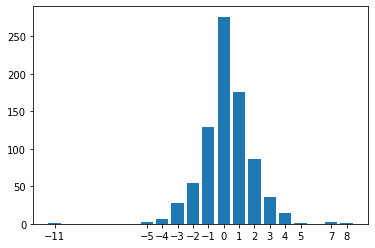

In [ ]:
labels, counts = np.unique(result, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

Data processing from 814 tweets resulted an average value in positive sentiment but quite small, 0.2. The majority of values ​​are at 0 means a lot of tweets don't have a word with sentiment positive/negative or positive/negative sentiments are balanced. Then followed by a value of +1 which indicates a straight comparison with the average value obtained. The positive value range between +1 to +5 with outliers at  values ​​of +7 and +8. While the range of negative values ​​is mostly in the values ​​–1 to –5 with a fairly large outlier, namely –11. This affected the standard deviation value obtained is much greater than the average value, namely 1.6.

*Sentiment Analysis Naive-bayes*

In [ ]:
combine = {'Raw Tweets':tweets_data["Tweets"], 'Raw-Label':result, 'Clean Tweets':rejoin_result}
df_l = pd.DataFrame(combine, columns=['Raw Tweets', 'Raw-Label', 'Clean Tweets'])

def func(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

df_l['Label'] = df_l['Raw-Label'].apply(func)
df_l

,Raw Tweets,Raw-Label,Clean Tweets,Label
0,"Vaksinasi Dijadwalkan Pekan Depan, Fadli Zon k...",3,vaksinasi jadwal pekan fadli zon kemenkes vaks...,1
1,"Saya ingin bertanya pd @KemenkesRI , vaksin Si...",0,pd kemenkesri vaksin sinovac dr china yg sunti...,0
2,Jokowi dan Para Menteri Disuntik Vaksin Sinova...,1,jokowi menteri suntik vaksin sinovac januari,1
3,@tsetiady Turki udah umumin tanggal 25. Tapi b...,0,tsetiady turki udah umumin tanggal tulis jurna...,0
4,Jangan terburu-buru untuk mengeluarkannya mesk...,0,terburuburu jadwal perdana januari,0
...,...,...,...,...
809,Vaksin corona Sinovac mulai didistribusikan ke...,0,vaksin corona sinovac distribusi provinsi kump...,0
810,DISINFORMASI\nPartai Komunis China Akui Kualit...,-3,disinformasipartai komunis china kualitas vaks...,-1
811,DISINFORMASI\nVaksin Sinovac hanya untuk Kelin...,0,disinformasivaksin sinovac kelinci coba diseba...,0
812,Beredar Isu Vaksin Covid-19 Sinovac Hanya untu...,-1,edar isu vaksin covid sinovac uji klinis bio f...,-1


In [ ]:
!pip install sklearn

In [ ]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import ComplementNB

tfidf = TfidfVectorizer (max_features=2500)
tfidf_stat = tfidf.fit_transform(df_l['Clean Tweets'])
tfidf_stat

<814x1935 sparse matrix of type '<class 'numpy.float64'>'
	with 8798 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(tfidf_stat, df_l['Label'], test_size=0.2, random_state=12)

#TF_IDF Data
MNB = MultinomialNB()
MNB.fit(x1_train,y1_train)
accuracy_MNB = metrics.accuracy_score(MNB.predict(x1_test),y1_test)
print('accuracy_MNB =', accuracy_MNB*100, '%')

accuracy_MNB = 67.48466257668711 %


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,1))
model_g = MultinomialNB()
model_g.fit(x1_train,y1_train)
v_data = vectorizer.fit_transform(df_l['Clean Tweets']).toarray()
print(v_data)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(MNB.predict(x1_test),y1_test))
print(classification_report(MNB.predict(x1_test),y1_test))
print('the accuration value is ',accuracy_score(MNB.predict(x1_test),y1_test))

[[15  0  0]
 [16 40 11]
 [11 15 55]]
              precision    recall  f1-score   support

          -1       0.36      1.00      0.53        15
           0       0.73      0.60      0.66        67
           1       0.83      0.68      0.75        81

    accuracy                           0.67       163
   macro avg       0.64      0.76      0.64       163
weighted avg       0.75      0.67      0.69       163

the accuration value is  0.6748466257668712


In [ ]:
tweet = ''
v_data = vectorizer.fit_transform(df_l['Clean Tweets']).toarray()
predict = model_g.predict(v_data)
df_l['Prediction Value'] = predict
df_l

,Raw Tweets,Raw-Label,Clean Tweets,Label,Prediction Value,Prediction
0,"Vaksinasi Dijadwalkan Pekan Depan, Fadli Zon k...",3,vaksinasi jadwal pekan fadli zon kemenkes vaks...,1,1,Positive
1,"Saya ingin bertanya pd @KemenkesRI , vaksin Si...",0,pd kemenkesri vaksin sinovac dr china yg sunti...,0,0,Positive
2,Jokowi dan Para Menteri Disuntik Vaksin Sinova...,1,jokowi menteri suntik vaksin sinovac januari,1,1,Negative
3,@tsetiady Turki udah umumin tanggal 25. Tapi b...,0,tsetiady turki udah umumin tanggal tulis jurna...,0,0,Negative
4,Jangan terburu-buru untuk mengeluarkannya mesk...,0,terburuburu jadwal perdana januari,0,0,Negative
...,...,...,...,...,...,...
809,Vaksin corona Sinovac mulai didistribusikan ke...,0,vaksin corona sinovac distribusi provinsi kump...,0,0,Negative
810,DISINFORMASI\nPartai Komunis China Akui Kualit...,-3,disinformasipartai komunis china kualitas vaks...,-1,-1,Negative
811,DISINFORMASI\nVaksin Sinovac hanya untuk Kelin...,0,disinformasivaksin sinovac kelinci coba diseba...,0,0,Negative
812,Beredar Isu Vaksin Covid-19 Sinovac Hanya untu...,-1,edar isu vaksin covid sinovac uji klinis bio f...,-1,-1,Negative


Based on the following results, it can be seen that the level of precision of the data with –1 label very low even though the recall is high with relevant result of frequency about 53% on a total of 15 results.At label 0, the precision is greater than the prediction, namely 73% to 60% with a relevant frequency around 66% in the total of 67 results. While label 1 obtained a sufficient level of precision
as high as 0.83 which indicates the application of the method of giving the most relevant result in the data labeled 1. This value is also much greater than the recall value, which is 68% with relevance frequency up to 75% for a total of 81 results. The average weighting of each component alone ranges from 0.67-0.75 with total
supports 163 results.

*Wordcloud*

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 4.2MB/s 


In [ ]:
import xlsxwriter

df_l.to_excel("result_naive-bayes.xlsx", engine='xlsxwriter', index=False)

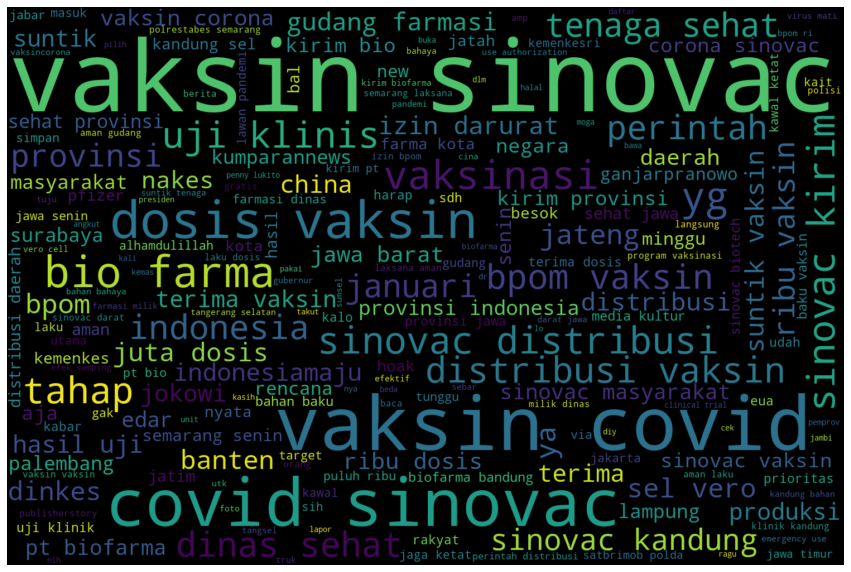

In [ ]:
x = pd.Series(rejoin_result)
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500, height=1000, max_font_size=200).generate(' '.join(x))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Conclusion

Based on the analysis using Multinomial Naïve Bayes methods in programming language applications
Python with data science for analyzing public opinion on the topic of the plan to use the Covid-19 vaccine produced by Sinovac by Indonesian government, it can be concluded that:
*   From the data of 814 tweets made by 485 user accounts from the 4th-5th
January 2020 mostly are active accounts with numbers followers and friends between 100-1000. These user accounts were created between 2008-2021 with most accounts created in 2020 and located in DKI Jakarta area
*   The data which is then processed with supporting data shows that the average value of all tweets is 0.2
which shows the sentiment of public opinion towards the topic of the Covid-19 vaccine tends to be more positive where the majority of people hope that progress will be made in handling the pandemic situation Covid-19 in Indonesia
*   A large enough standard deviation value indicates instability
data that is suspected to be due to difference in the positive and the negatives values are too big and become outliers especially in the range of negative values
*   The level of accuracy of the results obtained is quite good, 67.5% with a high level of precision especially on positive and neutral labels due to the method used very dependent on the data sources owned



